In [26]:
import torch
from torch import nn
from torch.utils.data import ConcatDataset, DataLoader
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose, RandomAffine
import matplotlib.pyplot as plt
from random import randint

In [27]:
# Download training data from open datasets.
og_training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

T = RandomAffine(degrees=90, translate=(0.2,0.2), scale=(0.4, 1.2))

random_training = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=Compose([
        ToTensor(),
        RandomAffine(degrees=45, translate=(0.3,0.3), scale=(0.8, 1.2))
    ]),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

training_data = ConcatDataset([og_training_data, random_training])

# Download test data from open datasets.
og_test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

random_testing = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=Compose([
        ToTensor(),
        RandomAffine(degrees=45, translate=(0.3,0.3), scale=(0.8, 1.2))
    ]),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))
)

test_data = ConcatDataset([og_test_data, random_testing])


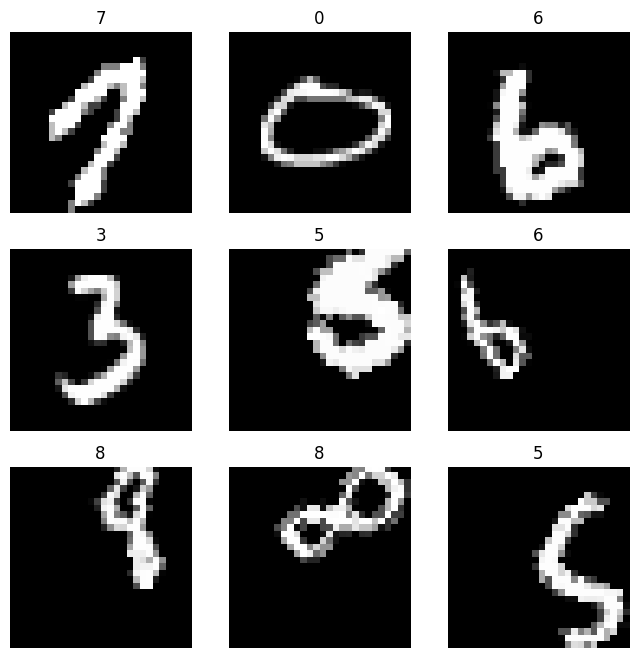

In [33]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = randint(0,len(training_data))
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label.argmax(0).item())
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()